<a href="https://colab.research.google.com/github/seher13/Nba/blob/main/NBA_stats_2021_22_Web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
data = requests.get(url).text

In [3]:
soup = BeautifulSoup(data, 'html5lib')

In [4]:
tables = soup.find_all('table')

In [5]:
len(tables)

1

In [6]:
df = pd.read_html(str(tables))[0]

In [7]:
df.iloc[:30,:]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,40,22,24.4,3.3,7.7,.427,0.4,1.3,.280,2.9,6.4,.455,.450,0.9,1.6,.538,2.3,5.0,7.3,1.2,0.6,0.6,1.0,2.1,7.8
1,2,Steven Adams,C,28,MEM,49,48,26.1,2.5,4.9,.519,0.0,0.0,NaN,2.5,4.9,.519,.519,1.5,2.7,.573,4.3,5.1,9.4,3.0,1.0,0.7,1.6,1.7,6.6
2,3,Bam Adebayo,C,24,MIA,27,27,33.4,6.8,13.0,.524,0.0,0.1,.000,6.8,12.9,.527,.524,4.5,5.9,.767,2.7,7.2,10.0,3.6,1.4,0.6,3.0,3.3,18.1
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4
5,6,Nickeil Alexander-Walker,SG,23,NOP,48,19,26.6,4.8,12.8,.373,1.9,6.2,.311,2.9,6.7,.431,.448,1.4,1.9,.731,0.8,2.5,3.3,2.8,0.8,0.4,1.7,1.7,12.9
6,7,Grayson Allen,SG,26,MIL,44,43,28.3,4.1,9.6,.424,2.6,6.6,.392,1.5,3.0,.496,.559,1.1,1.2,.870,0.6,3.0,3.5,1.5,0.8,0.3,0.6,1.4,11.8
7,8,Jarrett Allen,C,23,CLE,43,43,32.8,6.5,9.7,.677,0.0,0.2,.111,6.5,9.4,.690,.678,3.0,4.3,.699,3.4,7.5,10.8,1.9,0.8,1.4,1.8,1.8,16.1
8,9,Jose Alvarado,PG,23,NOP,24,1,11.8,1.6,4.1,.394,0.5,1.7,.325,1.1,2.5,.441,.460,0.5,0.8,.632,0.4,1.0,1.3,1.9,1.1,0.1,0.2,1.3,4.3
9,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,.316,0.5,2.5,.200,0.5,0.7,.750,.395,1.0,1.2,.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5


In [8]:
df2 = df[~df.Pos.str.contains('Pos')]

In [9]:
df2.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,40,22,24.4,3.3,7.7,.427,0.4,1.3,.280,2.9,6.4,.455,.450,0.9,1.6,.538,2.3,5.0,7.3,1.2,0.6,0.6,1.0,2.1,7.8
1,2,Steven Adams,C,28,MEM,49,48,26.1,2.5,4.9,.519,0.0,0.0,NaN,2.5,4.9,.519,.519,1.5,2.7,.573,4.3,5.1,9.4,3.0,1.0,0.7,1.6,1.7,6.6
2,3,Bam Adebayo,C,24,MIA,27,27,33.4,6.8,13.0,.524,0.0,0.1,.000,6.8,12.9,.527,.524,4.5,5.9,.767,2.7,7.2,10.0,3.6,1.4,0.6,3.0,3.3,18.1
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4
5,6,Nickeil Alexander-Walker,SG,23,NOP,48,19,26.6,4.8,12.8,.373,1.9,6.2,.311,2.9,6.7,.431,.448,1.4,1.9,.731,0.8,2.5,3.3,2.8,0.8,0.4,1.7,1.7,12.9
6,7,Grayson Allen,SG,26,MIL,44,43,28.3,4.1,9.6,.424,2.6,6.6,.392,1.5,3.0,.496,.559,1.1,1.2,.870,0.6,3.0,3.5,1.5,0.8,0.3,0.6,1.4,11.8
7,8,Jarrett Allen,C,23,CLE,43,43,32.8,6.5,9.7,.677,0.0,0.2,.111,6.5,9.4,.690,.678,3.0,4.3,.699,3.4,7.5,10.8,1.9,0.8,1.4,1.8,1.8,16.1
8,9,Jose Alvarado,PG,23,NOP,24,1,11.8,1.6,4.1,.394,0.5,1.7,.325,1.1,2.5,.441,.460,0.5,0.8,.632,0.4,1.0,1.3,1.9,1.1,0.1,0.2,1.3,4.3
9,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,.316,0.5,2.5,.200,0.5,0.7,.750,.395,1.0,1.2,.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5


In [10]:
df3 = df2.set_index('Rk')

In [11]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,40,22,24.4,3.3,7.7,.427,0.4,1.3,.280,2.9,6.4,.455,.450,0.9,1.6,.538,2.3,5.0,7.3,1.2,0.6,0.6,1.0,2.1,7.8
2,Steven Adams,C,28,MEM,49,48,26.1,2.5,4.9,.519,0.0,0.0,NaN,2.5,4.9,.519,.519,1.5,2.7,.573,4.3,5.1,9.4,3.0,1.0,0.7,1.6,1.7,6.6
3,Bam Adebayo,C,24,MIA,27,27,33.4,6.8,13.0,.524,0.0,0.1,.000,6.8,12.9,.527,.524,4.5,5.9,.767,2.7,7.2,10.0,3.6,1.4,0.6,3.0,3.3,18.1
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 1 to 590
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  649 non-null    object
 1   Pos     649 non-null    object
 2   Age     649 non-null    object
 3   Tm      649 non-null    object
 4   G       649 non-null    object
 5   GS      649 non-null    object
 6   MP      649 non-null    object
 7   FG      649 non-null    object
 8   FGA     649 non-null    object
 9   FG%     636 non-null    object
 10  3P      649 non-null    object
 11  3PA     649 non-null    object
 12  3P%     588 non-null    object
 13  2P      649 non-null    object
 14  2PA     649 non-null    object
 15  2P%     622 non-null    object
 16  eFG%    636 non-null    object
 17  FT      649 non-null    object
 18  FTA     649 non-null    object
 19  FT%     556 non-null    object
 20  ORB     649 non-null    object
 21  DRB     649 non-null    object
 22  TRB     649 non-null    object


In [13]:
seznam = np.arange(df3.shape[1])

In [14]:
seznam2 = np.delete(seznam, [0,1,3])

In [15]:
seznam2

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28])

In [16]:
seznam3 = df3.columns[seznam2]

In [17]:
for heading in seznam3:
  df3[heading] = pd.to_numeric(df3[heading], errors='coerce')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 1 to 590
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  649 non-null    object 
 1   Pos     649 non-null    object 
 2   Age     649 non-null    int64  
 3   Tm      649 non-null    object 
 4   G       649 non-null    int64  
 5   GS      649 non-null    int64  
 6   MP      649 non-null    float64
 7   FG      649 non-null    float64
 8   FGA     649 non-null    float64
 9   FG%     636 non-null    float64
 10  3P      649 non-null    float64
 11  3PA     649 non-null    float64
 12  3P%     588 non-null    float64
 13  2P      649 non-null    float64
 14  2PA     649 non-null    float64
 15  2P%     622 non-null    float64
 16  eFG%    636 non-null    float64
 17  FT      649 non-null    float64
 18  FTA     649 non-null    float64
 19  FT%     556 non-null    float64
 20  ORB     649 non-null    float64
 21  DRB     649 non-null    float64
 22  TRB    

In [18]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,40,22,24.4,3.3,7.7,0.427,0.4,1.3,0.280,2.9,6.4,0.455,0.450,0.9,1.6,0.538,2.3,5.0,7.3,1.2,0.6,0.6,1.0,2.1,7.8
2,Steven Adams,C,28,MEM,49,48,26.1,2.5,4.9,0.519,0.0,0.0,NaN,2.5,4.9,0.519,0.519,1.5,2.7,0.573,4.3,5.1,9.4,3.0,1.0,0.7,1.6,1.7,6.6
3,Bam Adebayo,C,24,MIA,27,27,33.4,6.8,13.0,0.524,0.0,0.1,0.000,6.8,12.9,0.527,0.524,4.5,5.9,0.767,2.7,7.2,10.0,3.6,1.4,0.6,3.0,3.3,18.1
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,0.381,0.1,1.4,0.103,1.2,2.1,0.569,0.402,0.4,0.7,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,0.555,0.3,1.1,0.316,5.4,9.3,0.582,0.571,1.6,1.9,0.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4


In [19]:
df3.sort_values('PTS', ascending=False).head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150,Kevin Durant,PF,33,BRK,36,36,36.5,10.5,20.3,0.520,1.9,5.0,0.372,8.7,15.3,0.568,0.566,6.3,7.1,0.894,0.6,6.9,7.4,5.8,0.8,0.9,3.0,1.9,29.3
157,Joel Embiid,C,27,PHI,38,38,32.9,9.4,18.9,0.499,1.3,3.4,0.366,8.2,15.4,0.528,0.532,9.0,11.1,0.811,2.0,8.7,10.8,4.4,0.9,1.4,3.0,2.6,29.1
266,LeBron James,SF,37,LAL,36,36,36.6,10.9,20.9,0.522,2.8,7.9,0.352,8.1,13.0,0.625,0.588,4.5,5.9,0.759,1.1,6.6,7.7,6.3,1.6,1.1,3.1,2.2,29.1
12,Giannis Antetokounmpo,PF,27,MIL,43,43,32.7,10.0,18.6,0.536,1.1,3.9,0.277,8.9,14.8,0.603,0.564,7.9,10.9,0.722,1.8,9.5,11.3,6.0,1.0,1.4,3.5,3.3,28.9
587,Trae Young,PG,23,ATL,45,45,34.5,9.3,20.6,0.452,2.9,7.8,0.376,6.4,12.8,0.498,0.523,6.2,7.0,0.895,0.6,3.4,4.1,9.3,1.0,0.1,4.2,1.6,27.7
131,DeMar DeRozan,PF,32,CHI,46,46,35.0,9.6,19.1,0.505,0.7,1.8,0.357,9.0,17.3,0.520,0.522,6.6,7.7,0.858,0.9,4.3,5.1,5.0,0.8,0.3,2.2,2.2,26.5
381,Ja Morant,PG,22,MEM,40,40,33.3,9.9,20.1,0.491,1.6,4.5,0.354,8.3,15.6,0.530,0.530,5.0,6.6,0.763,1.4,4.5,6.0,6.8,1.3,0.4,3.5,1.4,26.4
514,Jayson Tatum,SF,23,BOS,48,48,36.5,9.1,21.0,0.431,2.8,8.5,0.330,6.3,12.6,0.499,0.498,5.1,6.1,0.842,1.2,7.3,8.5,4.0,0.9,0.8,3.0,2.5,26.0
123,Stephen Curry,PG,33,GSW,47,47,34.8,8.4,20.1,0.419,4.8,12.6,0.379,3.6,7.4,0.487,0.538,4.4,4.8,0.912,0.6,4.8,5.5,6.3,1.5,0.4,3.2,2.0,26.0


In [20]:
df3['EFF'] = df3['PTS'] +  df3['TRB'] + df3['AST'] + df3['STL'] + df3['BLK'] - df3['TOV']

In [21]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,40,22,24.4,3.3,7.7,0.427,0.4,1.3,0.280,2.9,6.4,0.455,0.450,0.9,1.6,0.538,2.3,5.0,7.3,1.2,0.6,0.6,1.0,2.1,7.8,16.5
2,Steven Adams,C,28,MEM,49,48,26.1,2.5,4.9,0.519,0.0,0.0,NaN,2.5,4.9,0.519,0.519,1.5,2.7,0.573,4.3,5.1,9.4,3.0,1.0,0.7,1.6,1.7,6.6,19.1
3,Bam Adebayo,C,24,MIA,27,27,33.4,6.8,13.0,0.524,0.0,0.1,0.000,6.8,12.9,0.527,0.524,4.5,5.9,0.767,2.7,7.2,10.0,3.6,1.4,0.6,3.0,3.3,18.1,30.7
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,0.381,0.1,1.4,0.103,1.2,2.1,0.569,0.402,0.4,0.7,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3,6.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,0.555,0.3,1.1,0.316,5.4,9.3,0.582,0.571,1.6,1.9,0.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4,20.5


In [27]:
top10 = df3.sort_values('EFF', ascending=False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
282,Nikola Jokić,C,26,DEN,45,45,33.0,9.9,17.4,0.572,1.6,4.3,0.375,8.3,13.1,0.637,0.618,4.5,5.5,0.814,2.7,11.1,13.8,7.8,1.4,0.7,3.6,2.6,25.9,46.0
12,Giannis Antetokounmpo,PF,27,MIL,43,43,32.7,10.0,18.6,0.536,1.1,3.9,0.277,8.9,14.8,0.603,0.564,7.9,10.9,0.722,1.8,9.5,11.3,6.0,1.0,1.4,3.5,3.3,28.9,45.1
157,Joel Embiid,C,27,PHI,38,38,32.9,9.4,18.9,0.499,1.3,3.4,0.366,8.2,15.4,0.528,0.532,9.0,11.1,0.811,2.0,8.7,10.8,4.4,0.9,1.4,3.0,2.6,29.1,43.6
266,LeBron James,SF,37,LAL,36,36,36.6,10.9,20.9,0.522,2.8,7.9,0.352,8.1,13.0,0.625,0.588,4.5,5.9,0.759,1.1,6.6,7.7,6.3,1.6,1.1,3.1,2.2,29.1,42.7
150,Kevin Durant,PF,33,BRK,36,36,36.5,10.5,20.3,0.520,1.9,5.0,0.372,8.7,15.3,0.568,0.566,6.3,7.1,0.894,0.6,6.9,7.4,5.8,0.8,0.9,3.0,1.9,29.3,41.2
138,Luka Dončić,PG,22,DAL,36,36,35.0,9.2,20.7,0.444,2.4,7.9,0.309,6.7,12.8,0.527,0.503,4.8,6.6,0.737,0.8,8.1,8.9,8.9,1.2,0.5,4.4,2.3,25.6,40.7
211,James Harden,PG,32,BRK,43,43,37.0,6.7,16.2,0.417,2.4,7.0,0.338,4.4,9.1,0.478,0.491,7.1,8.1,0.869,1.0,7.0,8.0,10.1,1.3,0.7,4.8,2.4,22.9,38.2
587,Trae Young,PG,23,ATL,45,45,34.5,9.3,20.6,0.452,2.9,7.8,0.376,6.4,12.8,0.498,0.523,6.2,7.0,0.895,0.6,3.4,4.1,9.3,1.0,0.1,4.2,1.6,27.7,38.0
381,Ja Morant,PG,22,MEM,40,40,33.3,9.9,20.1,0.491,1.6,4.5,0.354,8.3,15.6,0.530,0.530,5.0,6.6,0.763,1.4,4.5,6.0,6.8,1.3,0.4,3.5,1.4,26.4,37.4


In [33]:
top10 = top10.reset_index().iloc[:,1:]
top10

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
0,Nikola Jokić,C,26,DEN,45,45,33.0,9.9,17.4,0.572,1.6,4.3,0.375,8.3,13.1,0.637,0.618,4.5,5.5,0.814,2.7,11.1,13.8,7.8,1.4,0.7,3.6,2.6,25.9,46.0
1,Giannis Antetokounmpo,PF,27,MIL,43,43,32.7,10.0,18.6,0.536,1.1,3.9,0.277,8.9,14.8,0.603,0.564,7.9,10.9,0.722,1.8,9.5,11.3,6.0,1.0,1.4,3.5,3.3,28.9,45.1
2,Joel Embiid,C,27,PHI,38,38,32.9,9.4,18.9,0.499,1.3,3.4,0.366,8.2,15.4,0.528,0.532,9.0,11.1,0.811,2.0,8.7,10.8,4.4,0.9,1.4,3.0,2.6,29.1,43.6
3,LeBron James,SF,37,LAL,36,36,36.6,10.9,20.9,0.522,2.8,7.9,0.352,8.1,13.0,0.625,0.588,4.5,5.9,0.759,1.1,6.6,7.7,6.3,1.6,1.1,3.1,2.2,29.1,42.7
4,Kevin Durant,PF,33,BRK,36,36,36.5,10.5,20.3,0.520,1.9,5.0,0.372,8.7,15.3,0.568,0.566,6.3,7.1,0.894,0.6,6.9,7.4,5.8,0.8,0.9,3.0,1.9,29.3,41.2
5,Luka Dončić,PG,22,DAL,36,36,35.0,9.2,20.7,0.444,2.4,7.9,0.309,6.7,12.8,0.527,0.503,4.8,6.6,0.737,0.8,8.1,8.9,8.9,1.2,0.5,4.4,2.3,25.6,40.7
6,James Harden,PG,32,BRK,43,43,37.0,6.7,16.2,0.417,2.4,7.0,0.338,4.4,9.1,0.478,0.491,7.1,8.1,0.869,1.0,7.0,8.0,10.1,1.3,0.7,4.8,2.4,22.9,38.2
7,Trae Young,PG,23,ATL,45,45,34.5,9.3,20.6,0.452,2.9,7.8,0.376,6.4,12.8,0.498,0.523,6.2,7.0,0.895,0.6,3.4,4.1,9.3,1.0,0.1,4.2,1.6,27.7,38.0
8,Ja Morant,PG,22,MEM,40,40,33.3,9.9,20.1,0.491,1.6,4.5,0.354,8.3,15.6,0.530,0.530,5.0,6.6,0.763,1.4,4.5,6.0,6.8,1.3,0.4,3.5,1.4,26.4,37.4
9,Jayson Tatum,SF,23,BOS,48,48,36.5,9.1,21.0,0.431,2.8,8.5,0.330,6.3,12.6,0.499,0.498,5.1,6.1,0.842,1.2,7.3,8.5,4.0,0.9,0.8,3.0,2.5,26.0,37.2


Text(0, 0.5, 'Steals')

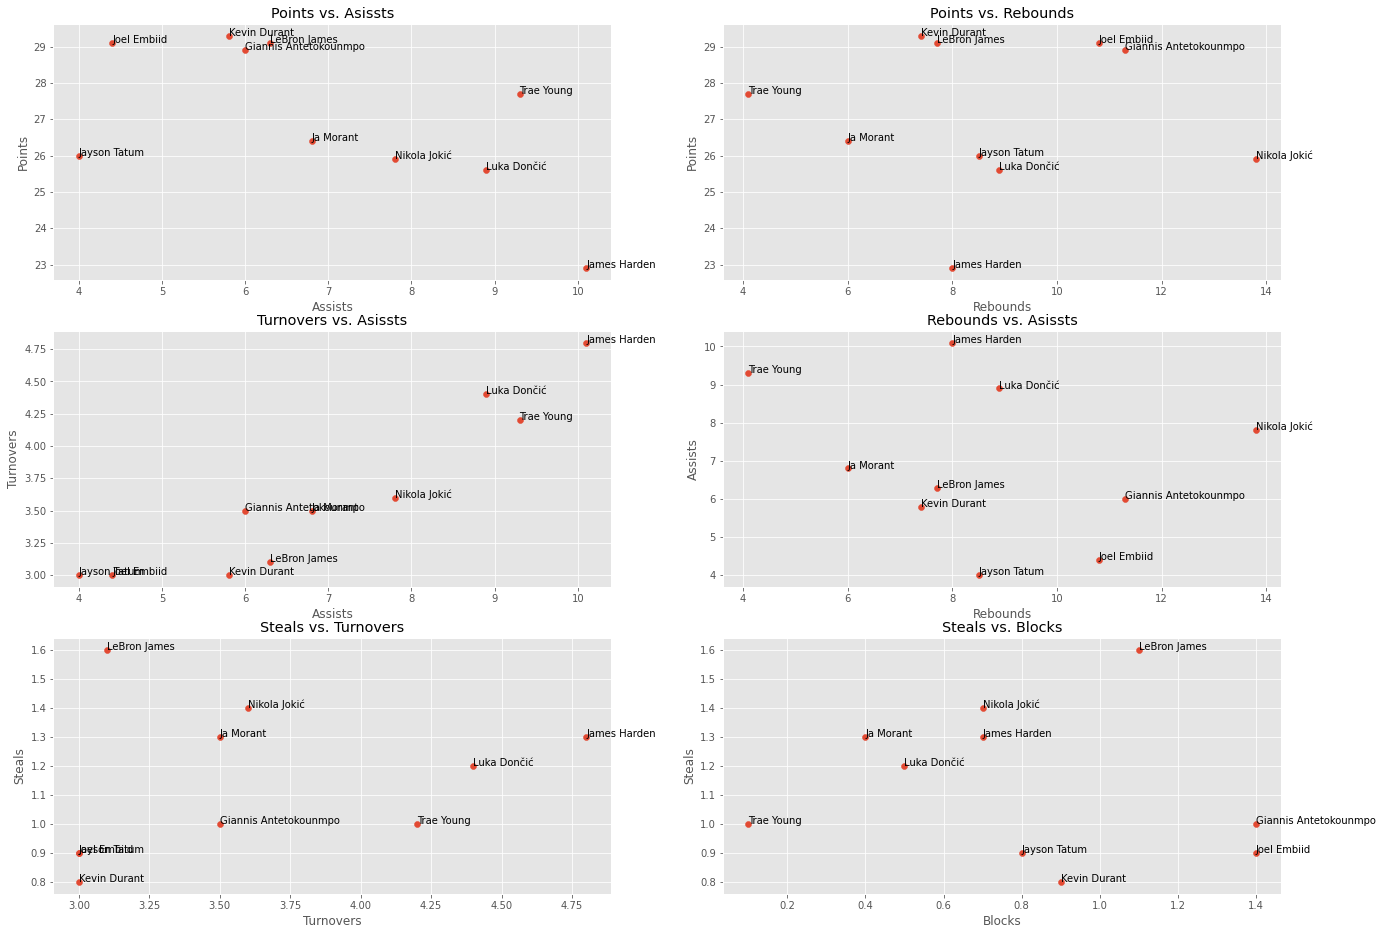

In [57]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(top10['AST'], top10['PTS'])
for i, txt in enumerate(top10['Player']):
  ax1.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'PTS']))
ax1.set_title('Points vs. Asissts')
ax1.set_xlabel('Assists')
ax1.set_ylabel('Points')

ax2.scatter(top10['TRB'], top10['PTS'])
for i, txt in enumerate(top10['Player']):
  ax2.annotate(txt, (top10.loc[i,'TRB'], top10.loc[i,'PTS']))
ax2.set_title('Points vs. Rebounds')
ax2.set_xlabel('Rebounds')
ax2.set_ylabel('Points')

ax3.scatter(top10['AST'], top10['TOV'])
for i, txt in enumerate(top10['Player']):
  ax3.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'TOV']))
ax3.set_title('Turnovers vs. Asissts')
ax3.set_xlabel('Assists')
ax3.set_ylabel('Turnovers')


ax4.scatter(top10['TRB'], top10['AST'])
for i, txt in enumerate(top10['Player']):
  ax4.annotate(txt, (top10.loc[i,'TRB'], top10.loc[i,'AST']))
ax4.set_title('Rebounds vs. Asissts')
ax4.set_xlabel('Rebounds')
ax4.set_ylabel('Assists')

ax5.scatter(top10['TOV'], top10['STL'])
for i, txt in enumerate(top10['Player']):
  ax5.annotate(txt, (top10.loc[i,'TOV'], top10.loc[i,'STL']))
ax5.set_title('Steals vs. Turnovers')
ax5.set_xlabel('Turnovers')
ax5.set_ylabel('Steals')

ax6.scatter(top10['BLK'], top10['STL'])
for i, txt in enumerate(top10['Player']):
  ax6.annotate(txt, (top10.loc[i,'BLK'], top10.loc[i,'STL']))
ax6.set_title('Steals vs. Blocks')
ax6.set_xlabel('Blocks')
ax6.set_ylabel('Steals')



Text(0, 0.5, 'Offensive rebounds')

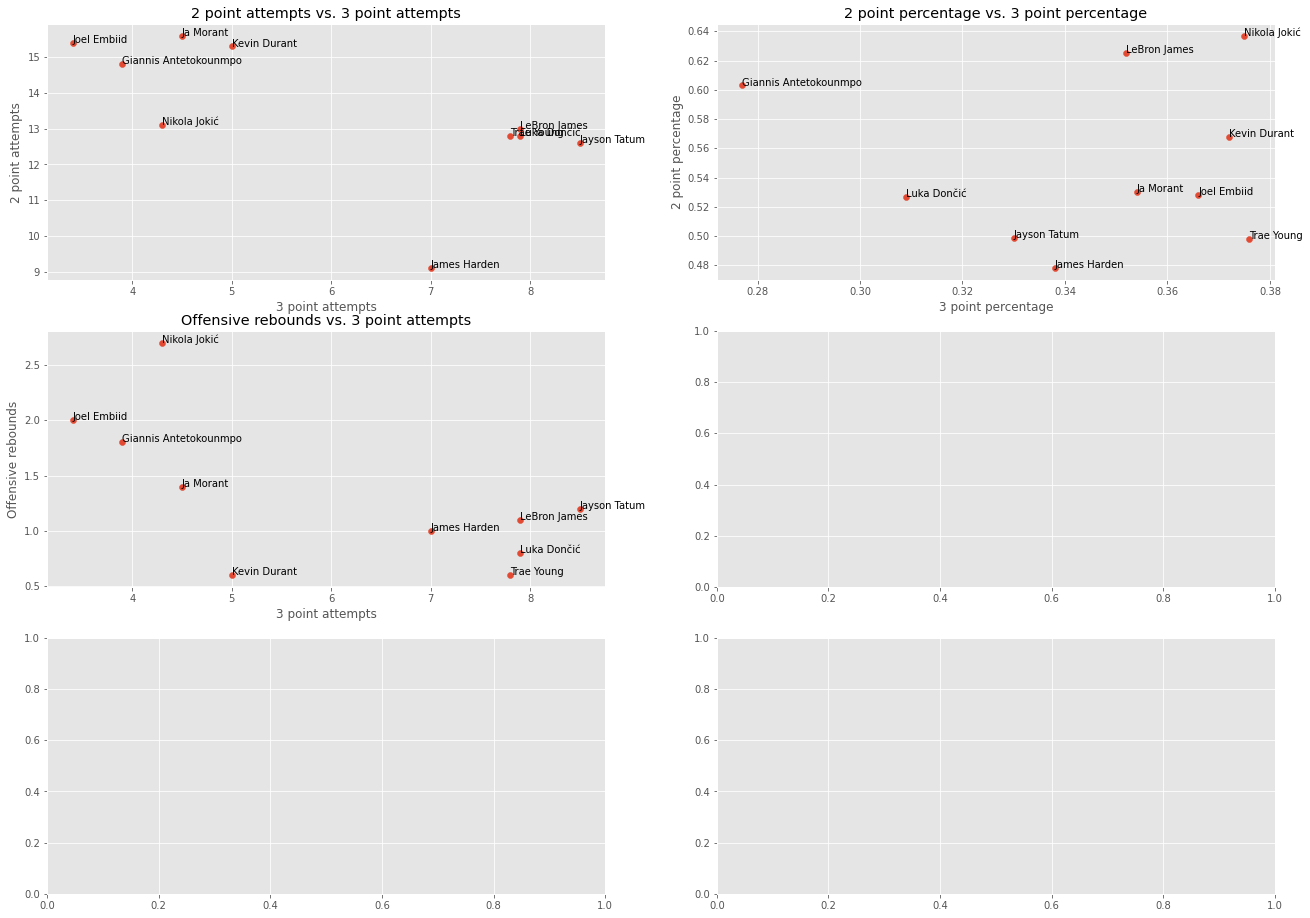

In [61]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(top10['3PA'], top10['2PA'])
for i, txt in enumerate(top10['Player']):
  ax1.annotate(txt, (top10.loc[i,'3PA'], top10.loc[i,'2PA']))
ax1.set_title('2 point attempts vs. 3 point attempts')
ax1.set_xlabel('3 point attempts')
ax1.set_ylabel('2 point attempts')

ax2.scatter(top10['3P%'], top10['2P%'])
for i, txt in enumerate(top10['Player']):
  ax2.annotate(txt, (top10.loc[i,'3P%'], top10.loc[i,'2P%']))
ax2.set_title('2 point percentage vs. 3 point percentage')
ax2.set_xlabel('3 point percentage')
ax2.set_ylabel('2 point percentage')


ax3.scatter(top10['3PA'], top10['ORB'])
for i, txt in enumerate(top10['Player']):
  ax3.annotate(txt, (top10.loc[i,'3PA'], top10.loc[i,'ORB']))
ax3.set_title('Offensive rebounds vs. 3 point attempts')
ax3.set_xlabel('3 point attempts')
ax3.set_ylabel('Offensive rebounds')

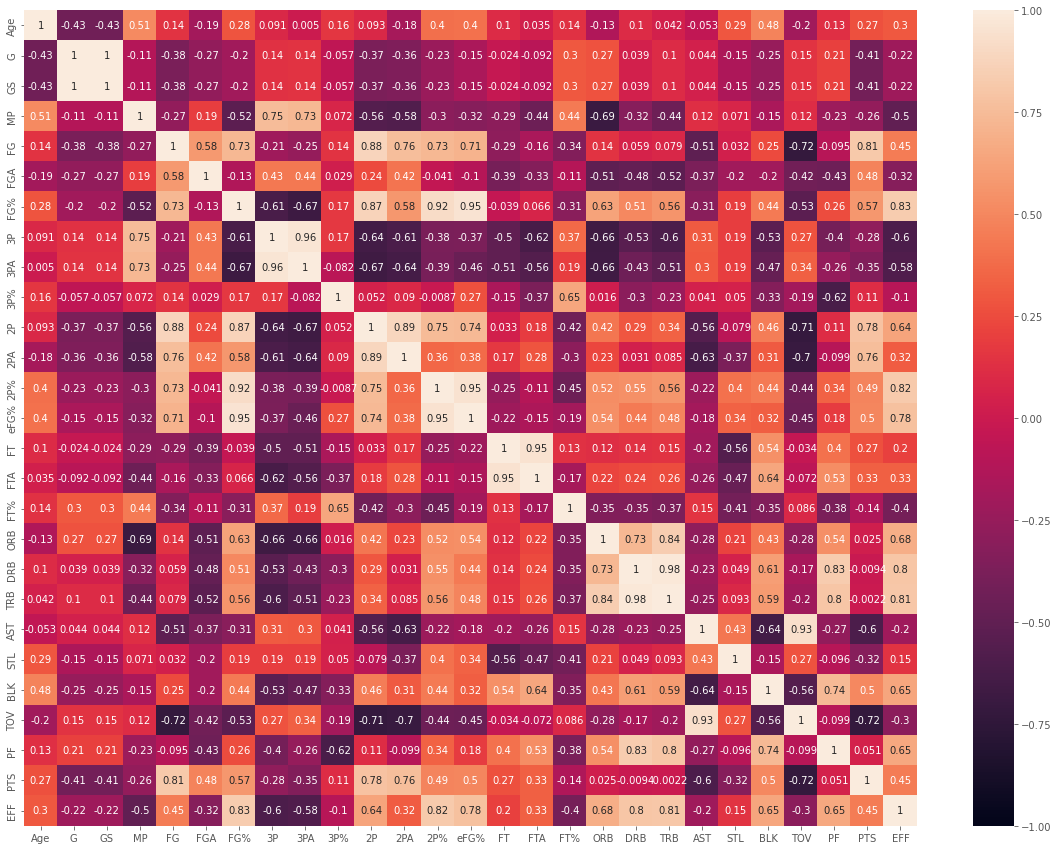

In [49]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)

corrMatrix = top10.corr()
ax1 = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True)
plt.show()

# Findings
1. Age does not correlate with success of top 10 players
2. Minutes played have high negative correlation with offensive rebounds and with 2 points shot attempts. On the other hand it has high positive correlation with 3 point shot attempts -> Possible hypothesis: Players who play longer drive less to the basket, which saves them energy. Or players who play longer are playmakers, less likely to get rebounds and more likely to shoot for 3.
3. Field goals % has high correlation with field goals made, which is logical. Surprisingly there is no correlation with field goals attempts. Field goals percentage also has high positive correlation with 2 points attemts and rebounds. On the other hand high negative correlation with 3 points attempts. -> Possible hypothesis -> Players who play closer to the basket have higher field goals percentage as they have more dunks and lay ups.
4. Players who shoot more for 3 points shoot less for 2 points and less free throws as they are less fouls commited on the,. They also have less rebounds as they play more away from basket. Interestngly, there is high negative correlation with efficacy score -> Players who shoot more for 3 points have lower efficiency score. The opposite as for players who shoot more for 3 points is valid for players who shoot more for 2 points.
5. Rebounds (offensive, defensive, total) are highly positively correlated, which is logical